IMPORT


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder



pandas dataframe luonti ja datan siistintä


In [25]:
cancer_df1 = pd.read_csv('breast-cancer.csv')
cancer_df1.dropna
cancer_df = cancer_df1.drop(columns=['id', 'diagnosis'])
print(type(cancer_df))

<class 'pandas.core.frame.DataFrame'>


skaaleri (kukaan ei osaa, magiaa)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cancer_df)

Klusterointi (optimaalisen K:n arviointi)

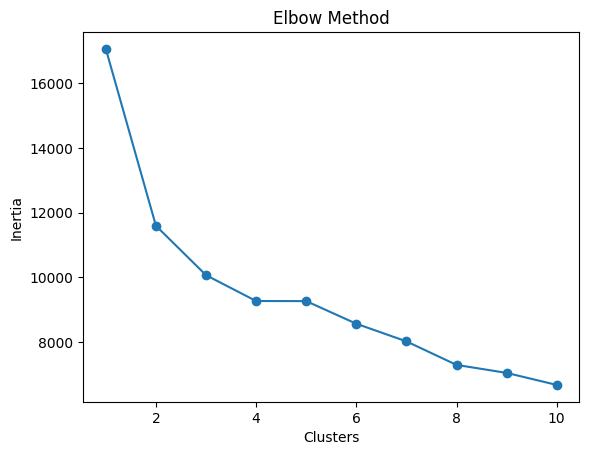

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

k-means klusterointi

In [28]:
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)
clusters = kmeans.labels_
cancer_df['Cluster'] = clusters

evaluointi

In [29]:
comparison = pd.crosstab(cancer_df['Cluster'], cancer_df1['diagnosis'])
print(comparison)

diagnosis    B   M
Cluster           
0           11   1
1           40  44
2           86   0
3            0   2
4            0  78
5          145   3
6            0   3
7            0  37
8            4  33
9           71  11


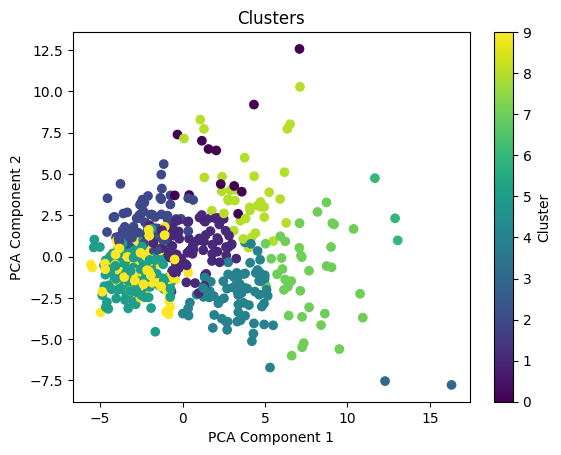

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()